Written description of three observable trends based on the data:

    Urban city type has the biggest % for all the pie charts while rural areas has the smallest.
    
    With few exceptions, rural areas had largest average cost of fares with lowest amount of drivers. 
    Urban areas had, for the most part, the lowest average fare cost with highest number of drivers per city.
    
    Markers for suburban areas were for the most part clustered together, more so than rural and urban markers. 


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_data_df, city_data_df, how="left", on="city")

# Display the data table for preview
# Export file as a CSV, without the Pandas index, but with the header
merge_table.head()
total_rides = len(merge_table)
total_fares = merge_table['fare'].sum()
total_drivers = city_data_df['driver_count'].sum()

In [3]:
urban_df = merge_table.loc[merge_table['type'] == 'Urban']
urban_df.set_index('driver_count', inplace=True)
urban_df = urban_df.drop(['date', 'ride_id', 'type'], axis=1, inplace=False)
urban_fares = urban_df['fare'].sum()
urban_rides = urban_df['fare'].count()

urban_fare = urban_df.groupby('city')['fare'].sum()
urban_count = urban_df.groupby('city')['fare'].count()
urban_df = urban_df.drop_duplicates(['city'], keep='first', inplace=False)
urban_df = urban_df.sort_values(['city'], inplace=False)
urban_df1 = pd.DataFrame({'cities': urban_fare.index,'total fare': urban_fare.values, 'total rides': urban_count.values,
                         'driverCount': urban_df.index})
urban_df1.set_index('cities', inplace=True)
urban_df1['Averages'] = urban_df1['total fare'] / urban_df1['total rides']
urban_drivers = urban_df1['driverCount'].sum()

In [4]:
suburban_df = merge_table.loc[merge_table['type'] == 'Suburban']
suburban_df.set_index('driver_count', inplace=True)
suburban_df = suburban_df.drop(['date', 'ride_id', 'type'], axis=1, inplace=False)
suburban_fares = suburban_df['fare'].sum()
suburban_rides = suburban_df['fare'].count()

suburban_fare = suburban_df.groupby('city')['fare'].sum()
suburban_count = suburban_df.groupby('city')['fare'].count()
suburban_df = suburban_df.drop_duplicates(['city'], keep='first', inplace=False)
suburban_df = suburban_df.sort_values(['city'], inplace=False)
suburban_df1 = pd.DataFrame({'cities': suburban_fare.index,'total fare': suburban_fare.values, 'total rides': suburban_count.values,
                         'driverCount': suburban_df.index})
suburban_df1.set_index('cities', inplace=True)
suburban_df1['Averages'] = suburban_df1['total fare'] / suburban_df1['total rides']
suburban_drivers = suburban_df1['driverCount'].sum()

In [5]:
rural_df = merge_table.loc[merge_table['type'] == 'Rural']
rural_df.set_index('driver_count', inplace=True)
rural_df = rural_df.drop(['date', 'ride_id', 'type'], axis=1, inplace=False)
rural_fares = rural_df['fare'].sum()
rural_rides = rural_df['fare'].count()

rural_fare = rural_df.groupby('city')['fare'].sum()
rural_count = rural_df.groupby('city')['fare'].count()
rural_df = rural_df.drop_duplicates(['city'], keep='first', inplace=False)
rural_df = rural_df.sort_values(['city'], inplace=False)
rural_df1 = pd.DataFrame({'cities': rural_fare.index,'total fare': rural_fare.values, 'total rides': rural_count.values,
                         'driverCount': rural_df.index})
rural_df1.set_index('cities', inplace=True)
rural_df1['Averages'] = rural_df1['total fare'] / rural_df1['total rides']
rural_drivers = rural_df1['driverCount'].sum()

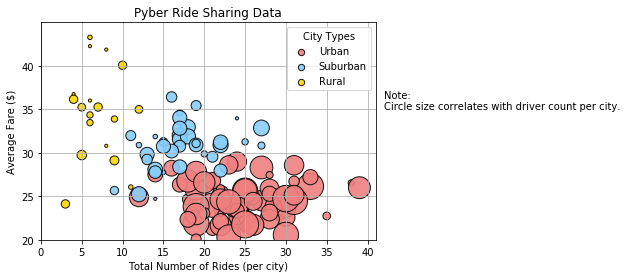

<Figure size 2880x1440 with 0 Axes>

In [6]:
urban_plot = plt.scatter(urban_df1['total rides'], urban_df1['Averages'], s=(urban_df1['driverCount'] * 10), marker="o", 
              facecolors="lightcoral", edgecolors="black", alpha=.9, linewidth=1, label='Urban')
suburban_plot = plt.scatter(suburban_df1['total rides'], suburban_df1['Averages'], s=(suburban_df1['driverCount'] * 10), marker="o", 
              facecolors="lightskyblue", edgecolors="black", alpha=.9, linewidth=1, label='Suburban')
rural_plot = plt.scatter(rural_df1['total rides'], rural_df1['Averages'], s=(rural_df1['driverCount'] * 10), marker="o", 
              facecolors="gold", edgecolors="black", alpha=.9, linewidth=1, label='Rural')
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.yticks(np.arange(20, 45, 5))
plt.xlim(0,41)
plt.ylim(20,45)
lgnd = plt.legend(handles=[urban_plot, suburban_plot, rural_plot], loc="best", title="City Types" )
for handle in lgnd.legendHandles:
    handle.set_sizes([40])
plt.text(42,35,'Note:\nCircle size correlates with driver count per city.', fontsize=10)
plt.grid(True)
plt.figure(figsize=(40, 20))
plt.tight_layout()
plt.show()

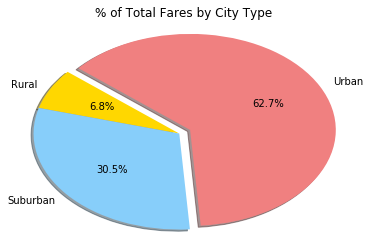

<Figure size 3600x1800 with 0 Axes>

In [7]:
rural_fares_percent = (rural_fares / total_fares ) * 100
urban_fares_percent = (urban_fares / total_fares ) * 100
suburban_fares_percent = (suburban_fares / total_fares ) * 100
city_types = ["Rural", "Suburban", "Urban"]
fares = [rural_fares_percent, suburban_fares_percent, urban_fares_percent]
colors = ["gold", "lightskyblue", "lightcoral" ]
explode = (0, 0, 0.1)
plt.pie(fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.2)
plt.axis('normal')
plt.title('% of Total Fares by City Type')
plt.figure(figsize=(50, 25))
plt.tight_layout()
plt.show()

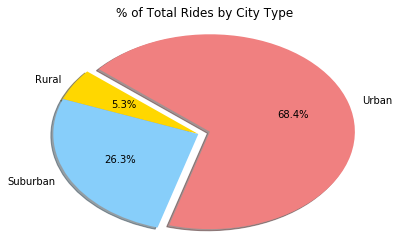

<Figure size 3600x1800 with 0 Axes>

In [8]:
rural_rides_percent = (rural_rides / total_rides ) * 100
urban_rides_percent = (urban_rides / total_rides ) * 100
suburban_rides_percent = (suburban_rides / total_rides ) * 100
city_types = ["Rural", "Suburban", "Urban"]
percentages = [rural_rides_percent, suburban_rides_percent, urban_rides_percent]
colors = ["gold", "lightskyblue", "lightcoral" ]
explode = (0, 0, 0.1)
plt.pie(percentages, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.2)
plt.axis('normal')
plt.title('% of Total Rides by City Type')
plt.figure(figsize=(50, 25))
plt.tight_layout()
plt.show()

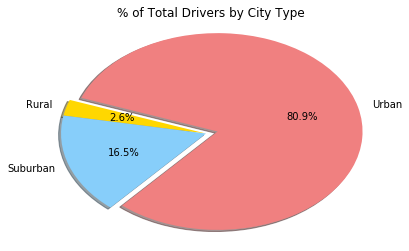

<Figure size 3600x1800 with 0 Axes>

In [9]:
rural_drivers_percent = (rural_drivers / total_drivers ) * 100
urban_drivers_percent = (urban_drivers / total_drivers ) * 100
suburban_drivers_percent = (suburban_drivers / total_drivers ) * 100
city_types = ["Rural", "Suburban", "Urban"]
percentages = [rural_drivers_percent, suburban_drivers_percent, urban_drivers_percent]
colors = ["gold", "lightskyblue", "lightcoral" ]
explode = (0, 0, 0.1)
plt.pie(percentages, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160, radius=1.2)
plt.axis('normal')
plt.title('% of Total Drivers by City Type')
plt.figure(figsize=(50, 25))
plt.tight_layout()
plt.show()